### SLR
We will predict employee salaries from different employee characteristics (or features). We are going to use a simple supervised learning technique: linear regression. We want to build a simple model to determine how well Years Worked predicts an employee’s salary. Import the data salary.csv to a Jupyter Notebook. A description of the variables is given in Salary Metadata. You will need the packages matplotlib, pandas and statsmodels.

In [5]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
# Read in the CSV datafile and drop null values
salaries = pd.read_csv("salary.csv")
salaries = salaries.dropna(axis = 0, how ='any')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        513 non-null int64
yearsworked    513 non-null int64
yearsrank      513 non-null int64
market         513 non-null float64
degree         513 non-null int64
otherqual      513 non-null int64
position       513 non-null int64
male           513 non-null int64
Field          513 non-null int64
yearsabs       513 non-null int64
dtypes: float64(2), int64(9)
memory usage: 48.1 KB


### Steps and questions
1. Split your data into a training and test set. Leave the test set for now. 
  - Examine the training data for missing and extreme values. 
  - Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. 
  - Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

In [3]:
# Creating the target variable for the test and training sets of data
X = salaries.drop('salary', axis = 1)
y = salaries['salary']

# Splitting the data into test and training sets by 80/20 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 42)



print(X_train.shape)

(410, 10)


Text(0, 0.5, 'Joint and Marginal Years Worked')

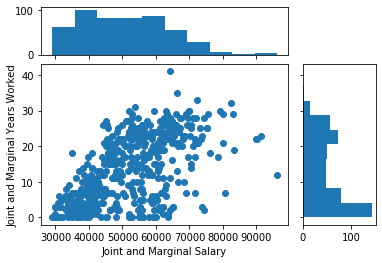

In [4]:
fig = plt.figure()

gs = GridSpec(4, 4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(salaries['salary'], salaries['yearsworked'])
ax_marg_x.hist(salaries['salary'])
ax_marg_y.hist(salaries['yearsworked'], orientation = "horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('Joint and Marginal Salary')
ax_joint.set_ylabel('Joint and Marginal Years Worked')

# Set labels on marginals
# ax_marg_y.set_xlabel('Marginal Salary')
# ax_marg_x.set_ylabel('Marginal Years Worked')
# plt.show()

### Markdown Reminder to explain graph


2. Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

  - Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.
  - What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?


In [8]:
yearwork = salaries['yearsworked']
salar = salaries['salary']

yearwork = sm.add_constant(yearwork) # adding a constant

model = sm.OLS(salar, yearwork).fit()
predictions = model.predict(yearwork) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     325.1
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           1.29e-56
Time:                        14:23:33   Log-Likelihood:                -5448.0
No. Observations:                 513   AIC:                         1.090e+04
Df Residuals:                     511   BIC:                         1.091e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.012e+04    739.844     54.221      

### Interpreting the Regression Results
I highlighted several important components within the results:

- Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- const coefficient is your Y-intercept. It means that if the yearsworked and coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
- yearsworked coefficient represents the change in the output Y due to a change of one unit in the yearsworked (everything else held constant)
- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
- P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
- Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

3. What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

4. What do the 95% confidence intervals [0.025, 0.975] mean?

5. Calculate the expected salary for someone with 12 years’ work experience.

6. Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

7. We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

Now fit your model to your test set. DO NOT BUILD A NEW MODEL ON THE TEST SET! Simply use your existing, model, to predict salaries in the test set.

1. How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting